# $$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big(y - \hat{y})^2 $$

# $$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big (y - (\theta_0 + \theta_1x_i \big))^2 $$

In [1]:
# $$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big(y - \hat{y})^2 $$
# $$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big (y - (\theta_0 + \theta_1x_i \big))^2 $$

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
# Linear Regression
# Making some sample data...

In [4]:
x_5 = np.array([0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5])
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2])

In [5]:
x_5.shape , y_5.shape

((7,), (7,))

In [6]:
# EE
regr = LinearRegression()
regr.fit(x_5, y_5)

ValueError: Expected 2D array, got 1D array instead:
array=[0.1 1.2 2.4 3.2 4.1 5.7 6.5].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [7]:
# two ways to reshape...one using the transpose and the other using the reshape...

In [8]:
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]])
x_5.shape

(1, 7)

In [10]:
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
x_5.shape

(7, 1)

In [11]:
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7,1)
y_5.shape

(7, 1)

In [12]:
regr = LinearRegression()
regr.fit(x_5, y_5)

LinearRegression()

In [13]:
regr.intercept_[0]

0.8475351486029536

In [14]:
regr.coef_[0][0]

1.2227264637835915

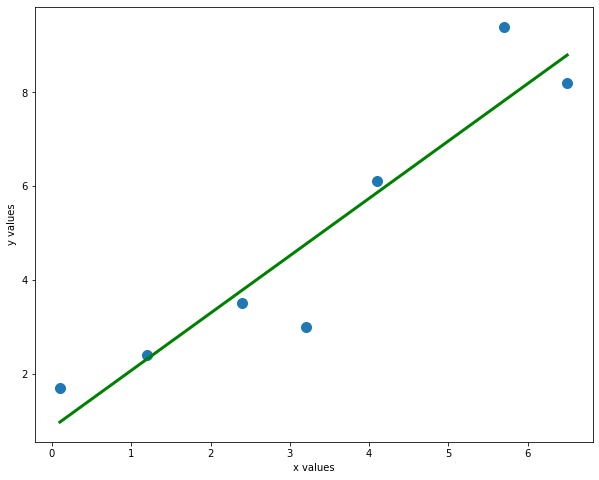

In [15]:
fig = plt.figure(figsize=[10, 8])
plt.scatter(x_5, y_5, s=100)
plt.plot(x_5, regr.predict(x_5), color='green', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [16]:
# y_hat????

# y_hat = theta_0 + theta_1*x_5

In [17]:
y_hat=regr.intercept_[0] + regr.coef_[0][0]*x_5
y_hat

array([[0.96980779],
       [2.31480691],
       [3.78207866],
       [4.76025983],
       [5.86071365],
       [7.81707599],
       [8.79525716]])

In [18]:
y_5

array([[1.7],
       [2.4],
       [3.5],
       [3. ],
       [6.1],
       [9.4],
       [8.2]])

In [19]:
(y_5) - (y_hat) # residuals

array([[ 0.73019221],
       [ 0.08519309],
       [-0.28207866],
       [-1.76025983],
       [ 0.23928635],
       [ 1.58292401],
       [-0.59525716]])

In [20]:
# MSE...
def mse (y, y_hat):
    

    mse_calc = 1/7 *sum((y - y_hat)**2)
    
    return mse_calc

In [21]:
mse(y_5, y_hat)[0]

0.9479655759794576

In [22]:
# few tricks.....various ways to get the MSE...

In [23]:
def mse_1(y, y_hat):
    mse_calc_1 = (1/y.size)*sum((y - y_hat)**2)
    return mse_calc_1

In [24]:
mse_1(y_5, y_hat)[0]

0.9479655759794576

In [25]:
def mse_2(y, y_hat):
    mse_calc_2 = np.average((y - y_hat)**2, axis=0)
    return mse_calc_2

In [26]:
mse_2(y_5, y_hat)[0]

0.9479655759794577

In [27]:
mean_squared_error(y_5, regr.predict(x_5))

0.9479655759794577

In [28]:
# make some thetas.......
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)

In [29]:
th_0.shape

(200,)

In [30]:
th_1.shape

(200,)

In [31]:
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)
plot_t0.shape

(200, 200)

In [32]:
plot_t1.shape

(200, 200)

In [33]:
plot_cost = np.zeros((nr_thetas,nr_thetas))
plot_cost

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
plot_cost.shape

(200, 200)

In [35]:
i = 0
j = 0

In [36]:
y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
plot_cost[i][j] = mse(y_5, y_hat)

In [37]:
plot_cost

array([[108.51285714,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [38]:
i = 0
j = 1

In [39]:
y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
plot_cost[i][j] = mse(y_5, y_hat)

In [40]:
plot_cost

array([[108.51285714, 108.14283763,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [43]:
i = 0
j = 2
y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
plot_cost[i][j] = mse(y_5, y_hat)

In [44]:
plot_cost

array([[108.51285714, 108.14283763, 107.77362617, ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [45]:
for i in range(nr_thetas):
    
    for j in range(nr_thetas):
        
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)

In [46]:
plot_cost

array([[108.51285714, 108.14283763, 107.77362617, ...,  51.2194266 ,
         51.00859498,  50.79857143],
       [106.88158925, 106.51424787, 106.14771456, ...,  50.11575289,
         49.90759941,  49.700254  ],
       [105.262904  , 104.89824077, 104.5343856 , ...,  49.02466182,
         48.81918649,  48.61451922],
       ...,
       [ 30.0738157 ,  30.23139037,  30.38977309, ...,  76.71643873,
         77.03320129,  77.35077191],
       [ 30.92133081,  31.08158362,  31.24264449, ...,  78.09154801,
         78.41098872,  78.73123749],
       [ 31.78142857,  31.94435952,  32.10809853, ...,  79.47923995,
         79.8013588 ,  80.12428571]])

C:\Users\manch\AppData\Local\Temp/ipykernel_5716/3700170965.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


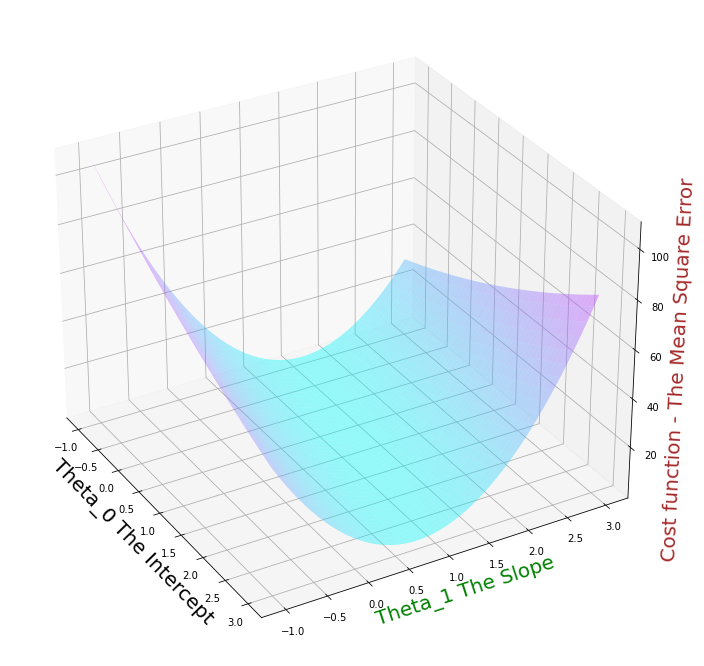

In [47]:
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')
ax.set_xlabel('Theta_0 The Intercept', fontsize=20, color ="black")
ax.set_ylabel('Theta_1 The Slope', fontsize=20, color ='green')
ax.set_zlabel('Cost function - The Mean Square Error', fontsize=20, color = 'brown')
ax.azim = -30
ax.plot_surface(plot_t0, plot_t1, plot_cost, alpha = 0.4, cmap = cm.cool)

plt.show()

In [48]:
# plot the GD on this Surface...

# $$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big (y - (\theta_0 + \theta_1x_i \big))^2 $$
# $$ \frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big (y_i -\theta_0 - \theta_1x_i \big)$$
# $$ \frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big (y_i -\theta_0 - \theta_1x_i \big)(x_i)$$

In [49]:
# $$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big (y - (\theta_0 + \theta_1x_i \big))^2 $$
# $$ \frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big (y_i -\theta_0 - \theta_1x_i \big)$$
# $$ \frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big (y_i -\theta_0 - \theta_1x_i \big)(x_i)$$

In [50]:
np.unravel_index(np.argmin(plot_cost, axis = None), plot_cost.shape)

(111, 91)

In [51]:
plot_cost[111][91]

0.9483826526747163

In [52]:
plot_t0[111][91]

0.829145728643216

In [53]:
plot_t1[111][91]

1.2311557788944723

In [54]:
mse(y_5, plot_t0[111][91]+plot_t1[111][91]*x_5)[0]

0.9483826526747163

In [55]:
# the GD....

In [56]:
def grad(x, y, thetas):
    
    n = y.size
    
    theta0_slope = (-2/n)* sum(y - thetas[0] - thetas[1]*x)
    
    theta1_slope = (-2/n)* sum((y - thetas[0] - thetas[1]*x)*x)
    
    
    return np.array([theta0_slope[0], theta1_slope[0]])

In [57]:
multiplier = 0.01

thetas = np.array([2.9, 2.9])

plot_vals = thetas.reshape(1,2)

mse_vals = mse(y_5, thetas[0]+ thetas[1]*x_5)


for i in range(1000):
    
    
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)
    
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))
    
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)

In [58]:
# plot

C:\Users\manch\AppData\Local\Temp/ipykernel_5716/4001008462.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


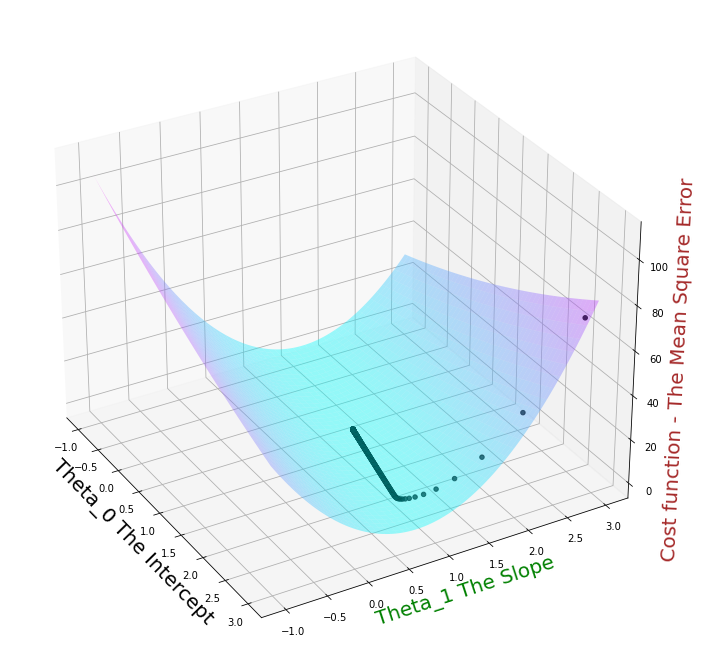

In [59]:
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')
ax.set_xlabel('Theta_0 The Intercept', fontsize=20, color ="black")
ax.set_ylabel('Theta_1 The Slope', fontsize=20, color ='green')
ax.set_zlabel('Cost function - The Mean Square Error', fontsize=20, color = 'brown')
ax.azim = -30
ax.plot_surface(plot_t0, plot_t1, plot_cost, alpha = 0.4, cmap = cm.cool)
ax.scatter(plot_vals[:,0], plot_vals[:,1], mse_vals, s = 20, color ='black')

plt.show()